<a href="https://colab.research.google.com/github/vinaynesta/Restraunt-Review-System/blob/main/Restaurant_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
!pip install scikit-learn --upgrade --quiet

In [54]:
!pip install opendatasets --upgrade --quiet

In [55]:
import opendatasets as od
import os

In [56]:
dataset_url = 'https://www.kaggle.com/d4rklucif3r/restaurant-reviews?select=Restaurant_Reviews.tsv'

In [57]:
od.download(dataset_url)

Skipping, found downloaded files in "./restaurant-reviews" (use force=True to force download)


# New Section

In [58]:
!pip install pandas --quiet

In [59]:
import pandas as pd

In [60]:
data_dir = './restaurant-reviews'

In [61]:
os.listdir(data_dir)

['Restaurant_Reviews.tsv']

In [62]:
train_csv = data_dir + '/Restaurant_Reviews.csv'

In [63]:
!pip install pandas --quiet

In [64]:
import pandas as pd

In [65]:
main_df =pd.read_csv('/content/restaurant-reviews/Restaurant_Reviews.tsv',sep='\t')

In [66]:
main_df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [67]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [68]:
input_col = 'Review'
target_col = 'Liked'

In [69]:
main_df[input_col]

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

In [70]:
main_df[target_col]

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [71]:
main_df.corr()

,Liked
Liked,1.0


In [72]:
main_df.isna().sum()

Review    0
Liked     0
dtype: int64

In [73]:
!pip install plotly matplotlib seaborn --quiet

In [74]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (10, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

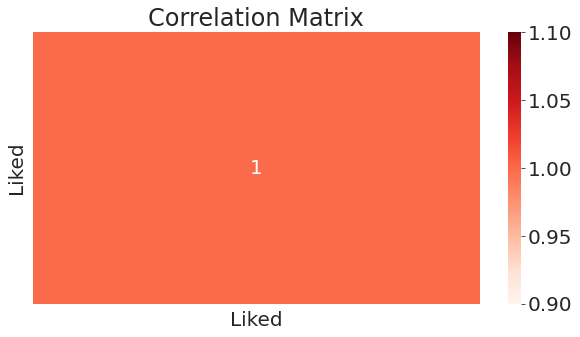

In [75]:
sns.heatmap(main_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

In [76]:
!pip install plotly matplotlib seaborn --quiet

In [77]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [78]:
px.histogram(main_df, x='Liked', title='review  vs. liked',color='Review')

In [79]:
px.histogram(main_df, x='Liked', title='review  vs. liked',color='Liked')

In [80]:
px.scatter(main_df, 
           title='marketing spend vs profit',
           x='Review', 
           y='Liked', 
           color='Liked')

In [81]:

from sklearn.feature_extraction.text import CountVectorizer

In [82]:
# Create a Vectorizer Object
vectorizer = CountVectorizer()
  
vectorizer.fit(main_df[input_col])
  
# Printing the identified Unique words along with their indices
print("Vocabulary: ", vectorizer.vocabulary_)
  
# Encode the Document
vector = vectorizer.transform(main_df[input_col])
  
# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())



Vocabulary:  {'wow': 2012, 'loved': 1046, 'this': 1798, 'place': 1330, 'crust': 427, 'is': 943, 'not': 1195, 'good': 764, 'tasty': 1761, 'and': 64, 'the': 1780, 'texture': 1774, 'was': 1940, 'just': 967, 'nasty': 1169, 'stopped': 1699, 'by': 264, 'during': 557, 'late': 991, 'may': 1087, 'bank': 139, 'holiday': 867, 'off': 1208, 'rick': 1488, 'steve': 1691, 'recommendation': 1444, 'it': 945, 'selection': 1560, 'on': 1221, 'menu': 1110, 'great': 778, 'so': 1630, 'were': 1965, 'prices': 1374, 'now': 1198, 'am': 57, 'getting': 746, 'angry': 66, 'want': 1934, 'my': 1162, 'damn': 439, 'pho': 1316, 'honeslty': 870, 'didn': 484, 'taste': 1757, 'that': 1778, 'fresh': 713, 'potatoes': 1362, 'like': 1016, 'rubber': 1505, 'you': 2027, 'could': 396, 'tell': 1766, 'they': 1788, 'had': 805, 'been': 167, 'made': 1061, 'up': 1883, 'ahead': 44, 'of': 1207, 'time': 1809, 'being': 173, 'kept': 969, 'under': 1866, 'warmer': 1938, 'fries': 719, 'too': 1824, 'touch': 1833, 'service': 1573, 'very': 1911, 'pro

In [83]:
print(vector.shape)

(1000, 2035)


In [84]:
#retrieve the terms found in the corpora
tokens = vectorizer.get_feature_names_out()
df_vect = pd.DataFrame(data = vector.toarray(),columns = tokens)
df_vect

,00,10,100,11,12,15,17,1979,20,2007,...,yelpers,yet,you,your,yourself,yucky,yukon,yum,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
y = main_df['Liked'].values # target
X = main_df.drop('Liked', axis = 1).values # predictors

print (y)
print (X) ; print ("")
print (type(X))

[1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1
 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0
 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1
 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0
 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1
 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1
 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1
 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1
 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0
 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0
 1 0 0 1 1 1 0 0 1 1 1 0 

In [86]:
#count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

cv = CountVectorizer(lowercase=True,
                     stop_words='english',
                     ngram_range = (1,1),
                     tokenizer = token.tokenize)

text_counts= cv.fit_transform(main_df['Review'])

print(text_counts.shape)

(1000, 1834)


/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [87]:
count_df = pd.DataFrame(text_counts.toarray(),columns=cv.get_feature_names_out())
count_df.head()

,00,1,10,100,11,12,15,17,1979,2,...,year,years,yellow,yellowtail,yelpers,yucky,yukon,yum,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(text_counts,main_df['Liked'],test_size=0.3,random_state=1)

In [89]:
from sklearn.svm import SVC
SVC_model = SVC(kernel = 'rbf')
SVC_model.fit(x_train, y_train)
y_pred_SVC = SVC_model.predict(x_test)
print("SVC Accuracy:",y_pred_SVC)

SVC Accuracy: [0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1
 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0
 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1
 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1
 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0
 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0
 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1
 0 0 1 1]


In [90]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
print("Random Forest Accuracy:",y_pred_rf)

Random Forest Accuracy: [1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1
 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1
 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0
 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0
 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0
 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1
 0 0 1 1]


In [91]:
from sklearn.naive_bayes import MultinomialNB

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Generation Using Multinomial Naive Bayes
NB_model = MultinomialNB().fit(x_train, y_train)

y_pred_NB= NB_model.predict(x_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, y_pred_NB))

MultinomialNB Accuracy: 0.7333333333333333


In [92]:
from sklearn.metrics import confusion_matrix
cm_NB = confusion_matrix(y_test, y_pred_NB)
cm_RandFor = confusion_matrix(y_test, y_pred_rf)
cm_SVC = confusion_matrix(y_test, y_pred_SVC)
print("Confusion matrix of SVC :")
print(cm_SVC)
print(" ")
print("Confusion matrix of RF :")
print(cm_RandFor)
print(" ")
print("Confusion matrix of NB :")
print(cm_NB)
print(" ")

Confusion matrix of SVC :
[[134  27]
 [ 47  92]]
 
Confusion matrix of RF :
[[111  50]
 [ 37 102]]
 
Confusion matrix of NB :
[[108  53]
 [ 27 112]]
 


In [93]:
# loading dependency
! pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
# saving our model 
import joblib
joblib.dump(SVC_model , 'model1(SVC)_jlib')
joblib.dump(rf_model, 'model2(rf)_jlib')
joblib.dump(NB_model, 'model3(NB)_jlib')

['model3(NB)_jlib']

In [95]:
# opening the file- model_jlib
m_jlib1 = joblib.load('model1(SVC)_jlib')
m_jlib2 = joblib.load('model2(rf)_jlib')
m_jlib3 = joblib.load('model3(NB)_jlib')

In [96]:
# check prediction 
res1=m_jlib1.score(x_test, y_test)
print('SVC :',res1)
res2 = m_jlib2.score(x_test, y_test)
print('RF :',res2)
res3 = m_jlib3.score(x_test, y_test)
print('NB :',res3)

SVC : 0.7533333333333333
RF : 0.71
NB : 0.7333333333333333


In [97]:
# Transform into matrix
val=cv.transform(["Service of the restaurant is good and food was delicous"])

# make prediction
NB_model.predict(val)

array([1])

In [98]:
# Transform into matrix
val=cv.transform(["Service of the restaurant is very bad"])

SVC_model.predict(val)

array([0])

In [99]:
# Transform into matrix
val=cv.transform(["Food quality is Excellent"])

# make prediction
SVC_model.predict(val)

array([1])

In [100]:
# Transform into matrix
val=cv.transform(["Food quality is good"])

# make prediction
rf_model.predict(val)

array([1])

In [101]:
# Transform into matrix
val=cv.transform(["Service of the restaurant is very bad"])

rf_model.predict(val)

array([0])